# Import Libraries

In [1]:
import pandas as pd                  # For data manupulation using dataframes
import numpy as np                   # For Statistical Analysis
import seaborn as sns                # for statistical Data Visualisation
import matplotlib. pyplot as plt     # For Data Visualisation

In [43]:
import warnings
warnings.filterwarnings('ignore')

# Import Dataset

In [2]:
d=pd.read_csv("gender.csv")
d.head()     # display columns and 5 rows of dataset        

,Gender,Age,Height_cm,Weight_kg,Occupation,Education_Level,Marital_Status,Income_USD,Favorite_Color
0,male,32,175,70,Software Engineer,Master's Degree,Married,75000,Blue
1,male,25,182,85,Sales Representative,Bachelor's Degree,Single,45000,Green
2,female,41,160,62,Doctor,Doctorate Degree,Married,120000,Purple
3,male,38,178,79,Lawyer,Bachelor's Degree,Single,90000,Red
4,female,29,165,58,Graphic Designer,Associate's Degree,Single,35000,Yellow


In [3]:
d.shape # shape of the dataset(no. of rows and columns)

(131, 9)

In [5]:
d.info()  # Information about datset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           131 non-null    object
 1   Age              131 non-null    int64 
 2   Height_cm        131 non-null    int64 
 3   Weight_kg        131 non-null    int64 
 4   Occupation       131 non-null    object
 5   Education_Level  131 non-null    object
 6   Marital_Status   131 non-null    object
 7   Income_USD       131 non-null    int64 
 8   Favorite_Color   131 non-null    object
dtypes: int64(4), object(5)
memory usage: 9.3+ KB


In [6]:
d.describe()  #Description about dataset

,Age,Height_cm,Weight_kg,Income_USD
count,131.000000,131.000000,131.000000,131.000000
mean,34.564885,173.198473,71.458015,93206.106870
std,5.984723,8.045467,12.648052,74045.382919
min,24.000000,160.000000,50.000000,30000.000000
25%,29.000000,166.000000,60.000000,55000.000000
50%,34.000000,175.000000,75.000000,75000.000000
75%,39.000000,180.500000,83.000000,100000.000000
max,52.000000,190.000000,94.000000,500000.000000


# Exploratory Data Analysis

In [7]:
d.isnull().sum()

Gender             0
Age                0
Height_cm          0
Weight_kg          0
Occupation         0
Education_Level    0
Marital_Status     0
Income_USD         0
Favorite_Color     0
dtype: int64

In [8]:
#Drop Unnecessary columns
d=d.iloc[:,:-1]
d

,Gender,Age,Height_cm,Weight_kg,Occupation,Education_Level,Marital_Status,Income_USD
0,male,32,175,70,Software Engineer,Master's Degree,Married,75000
1,male,25,182,85,Sales Representative,Bachelor's Degree,Single,45000
2,female,41,160,62,Doctor,Doctorate Degree,Married,120000
3,male,38,178,79,Lawyer,Bachelor's Degree,Single,90000
4,female,29,165,58,Graphic Designer,Associate's Degree,Single,35000
...,...,...,...,...,...,...,...,...
126,female,32,170,64,Nurse,Associate's Degree,Single,60000
127,male,38,176,79,Project Manager,Bachelor's Degree,Married,90000
128,female,27,162,55,Graphic Designer,Associate's Degree,Single,55000
129,male,33,175,77,Sales Representative,Bachelor's Degree,Married,80000


In [9]:
# Drop duplicate rows and row with null values
d=d.dropna(how="all")
d=d.drop_duplicates()
d.shape

(128, 8)

In [10]:
#invalid parsing will be set as NaN
d['Age']=pd.to_numeric(d['Age'],errors='coerce')
d['Height_cm']=pd.to_numeric(d['Height_cm'],errors='coerce')
d['Weight_kg']=pd.to_numeric(d['Weight_kg'],errors='coerce')
d['Income_USD']=pd.to_numeric(d['Income_USD'],errors='coerce')
#Datatype of categorical columns define as category
d['Gender']=d['Gender'].astype('category')
d['Occupation']=d['Occupation'].astype('category')
d['Education_Level']=d['Education_Level'].astype('category')
d['Marital_Status']=d['Marital_Status'].astype('category')

In [11]:
d.info()  # Dataset information after data cleaning and feature selection

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128 entries, 0 to 130
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Gender           128 non-null    category
 1   Age              128 non-null    int64   
 2   Height_cm        128 non-null    int64   
 3   Weight_kg        128 non-null    int64   
 4   Occupation       128 non-null    category
 5   Education_Level  128 non-null    category
 6   Marital_Status   128 non-null    category
 7   Income_USD       128 non-null    int64   
dtypes: category(4), int64(4)
memory usage: 6.7 KB


# Univariate Analysis for Continuous Columns

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Height_cm'}>],
       [<AxesSubplot:title={'center':'Weight_kg'}>,
        <AxesSubplot:title={'center':'Income_USD'}>]], dtype=object)

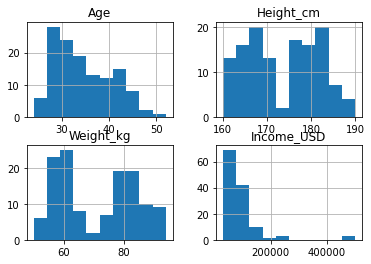

In [12]:
d.hist()

<AxesSubplot:>

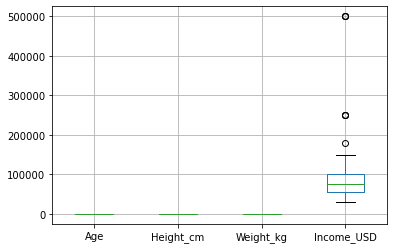

In [13]:
d.boxplot()

In [15]:
d['Gender'].value_counts() # Numbers of records of each category of discrete column

male      65
female    63
Name: Gender, dtype: int64

In [16]:
d['Occupation'].value_counts()

Teacher                 12
Writer                   9
Lawyer                   9
Nurse                    9
Graphic Designer         9
Marketing Specialist     9
Project Manager          8
Doctor                   8
Engineer                 8
Sales Representative     7
IT Manager               7
Architect                7
Analyst                  6
CEO                      6
Accountant               6
Business Analyst         5
Business Consultant      1
Software Developer       1
Software Engineer        1
Name: Occupation, dtype: int64

In [17]:
d['Education_Level'].value_counts()

Bachelor's Degree     77
Master's Degree       19
Associate's Degree    18
Doctorate Degree      14
Name: Education_Level, dtype: int64

In [18]:
d['Marital_Status'].value_counts()

Married     62
Single      59
Divorced     5
Widowed      2
Name: Marital_Status, dtype: int64

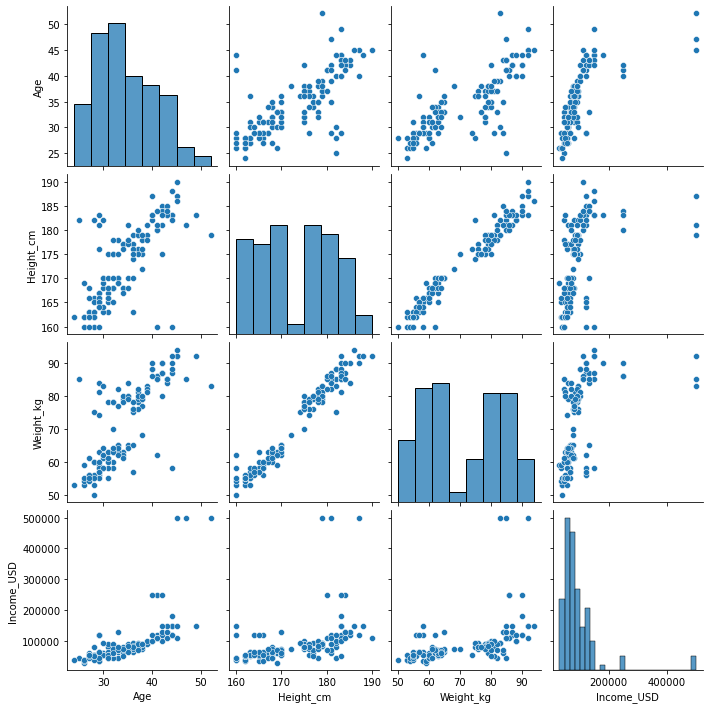

In [19]:
sns.pairplot(d)   #visuals representation of Correlation between all continuous columns.

In [20]:
d.corr()

,Age,Height_cm,Weight_kg,Income_USD
Age,1.000000,0.720806,0.779204,0.667324
Height_cm,0.720806,1.000000,0.975158,0.457235
Weight_kg,0.779204,0.975158,1.000000,0.489154
Income_USD,0.667324,0.457235,0.489154,1.000000


<AxesSubplot:>

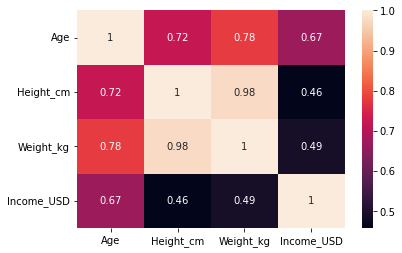

In [21]:
sns.heatmap(d.corr(),annot=True)

# Encoding

In [119]:
# Encoding of discrete columns
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
d['Gender']=le.fit_transform(d['Gender'])
d['Occupation']=le.fit_transform(d['Occupation'])
d['Education_Level']=le.fit_transform(d['Education_Level'])
d['Marital_Status']=le.fit_transform(d['Marital_Status'])
d.head()

,Gender,Age,Height_cm,Weight_kg,Occupation,Education_Level,Marital_Status,Income_USD
0,1,32,175,70,16,3,1,75000
1,1,25,182,85,14,1,2,45000
2,0,41,160,62,6,2,1,120000
3,1,38,178,79,10,1,2,90000
4,0,29,165,58,8,0,2,35000


# Evaluation

In [120]:
from sklearn.model_selection import train_test_split   #splitting dataset into train and test dataset

In [121]:
X=d.iloc[:,:-1] # Independent variables
Y=d.iloc[:,-1]  #Out variables

In [122]:
X

,Gender,Age,Height_cm,Weight_kg,Occupation,Education_Level,Marital_Status
0,1,32,175,70,16,3,1
1,1,25,182,85,14,1,2
2,0,41,160,62,6,2,1
3,1,38,178,79,10,1,2
4,0,29,165,58,8,0,2
...,...,...,...,...,...,...,...
125,1,43,184,85,10,3,1
126,0,32,170,64,12,0,2
128,0,27,162,55,8,0,2
129,1,33,175,77,14,1,1


In [123]:
Y

0       75000
1       45000
2      120000
3       90000
4       35000
        ...  
125    130000
126     60000
128     55000
129     80000
130     65000
Name: Income_USD, Length: 128, dtype: int64

In [135]:
X_train,X_test,Y_train,Y_test =train_test_split(X,Y, test_size=0.2,random_state=40) 
# Splitting dataset into 20% test dataset and 80% train dataset

In [136]:
X_train.shape

(102, 7)

In [137]:
X_test.shape

(26, 7)

# Building Machine Learning Model

In [138]:
from sklearn.ensemble import RandomForestRegressor   # import Random forest regressor model from sklearn
from sklearn import metrics

In [139]:
regr = RandomForestRegressor(max_depth=5, random_state=40)
regr.fit(X_train,Y_train)  #fitting the model

RandomForestRegressor(max_depth=5, random_state=40)

In [140]:
print ("Accuracy of All dataset: ", (regr.score(X,Y)))
print ("Accuracy of Train dataset: " ,(regr.score(X_train,Y_train)))
print ("Accuracy of Test dataset: " ,(regr.score(X_test,Y_test)))

Accuracy of All dataset:  0.8613112649116821
Accuracy of Train dataset:  0.8984128385559863
Accuracy of Test dataset:  0.759532372835445


In [167]:
from sklearn.neighbors import KNeighborsRegressor #import K nearest neighborr regressor model from sklearn

In [174]:
knnr = KNeighborsRegressor()
knnr.fit(X_train,Y_train)

KNeighborsRegressor()

In [175]:
print ("Accuracy of All dataset: ", (knnr.score(X,Y)))
print ("Accuracy of Train dataset: " ,(knnr.score(X_train,Y_train)))
print ("Accuracy of Test dataset: " ,(knnr.score(X_test,Y_test)))

Accuracy of All dataset:  0.5026292295605076
Accuracy of Train dataset:  0.5025628609239655
Accuracy of Test dataset:  0.502459274829217


In [176]:
from sklearn.ensemble import GradientBoostingRegressor #imnport XGboost regressor from sklearn

In [210]:
params ={"n_estimators": 300,
        "max_depth":4,
        "min_samples_split":5,
        "learning_rate": 0.01,
        "loss":"squared_error",}
reg=GradientBoostingRegressor(**params)
reg.fit(X_train,Y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5,
                          n_estimators=300)

In [216]:
y_pred=reg.predict(X_test)

In [211]:
print ("Accuracy of All dataset: ", (reg.score(X,Y)))
print ("Accuracy of Train dataset: " ,(reg.score(X_train,Y_train)))
print ("Accuracy of Test dataset: " ,(reg.score(X_test,Y_test)))

Accuracy of All dataset:  0.9582452703209905
Accuracy of Train dataset:  0.9785637228842583
Accuracy of Test dataset:  0.9025308667502843


In [220]:
from sklearn import metrics

In [224]:
print('MAE:', metrics.mean_absolute_error(Y_test,y_pred))
print('MSE:', metrics.mean_squared_error(Y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

MAE: 13056.13447918422
MSE: 713399079.1315732
RMSE: 26709.531615727992


Best model is "GradientBoostingRegressor" with highest score

# Save the Model

In [212]:
#model.py
import pickle # its used for seriealizing.
pickle.dump(reg, open('model.pkl','wb'))
model = pickle.load(open('model.pkl','rb'))

In [213]:
print(model.predict([[1,32,175,70,16,3,1]]))

[78832.56282464]
